In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [8]:
df=pd.read_csv('C:\\Users\\COMSOL\\Documents\\Real estate.csv')

In [9]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
df=df.rename(columns={'X1 transaction date':'date','X2 house age':'age','X3 distance to the nearest MRT station':'neighborhood','X4 number of convenience stores':'store','Y house price of unit area':'price'})

In [12]:
df.head()

,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
df.describe()


,No,date,age,neighborhood,store,X5 latitude,X6 longitude,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [14]:
df.isnull().sum()

No              0
date            0
age             0
neighborhood    0
store           0
X5 latitude     0
X6 longitude    0
price           0
dtype: int64

In [15]:
df1=df.drop(['No','date','X5 latitude','X6 longitude'],axis='columns')

In [16]:
df1.corr()

,age,neighborhood,store,price
age,1.000000,0.025622,0.049593,-0.210567
neighborhood,0.025622,1.000000,-0.602519,-0.673613
store,0.049593,-0.602519,1.000000,0.571005
price,-0.210567,-0.673613,0.571005,1.000000


In [17]:
df1.head()

,age,neighborhood,store,price
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [18]:
df1.isnull().sum()

age             0
neighborhood    0
store           0
price           0
dtype: int64

In [15]:
df1.shape

(414, 4)

In [19]:
df1['age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

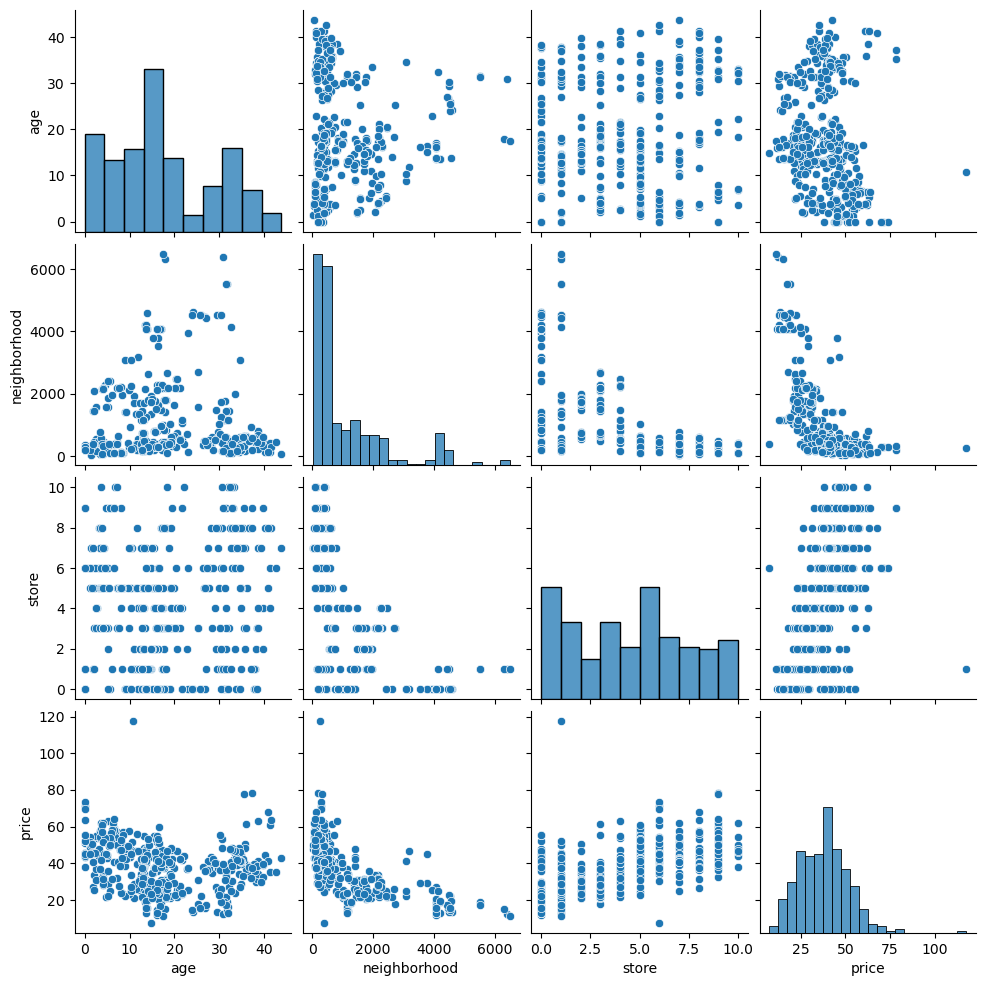

In [20]:
import seaborn as sns
sns.pairplot(df1)

In [18]:
df1.price.max()

117.5

In [21]:
df1[df1.price>100]

,age,neighborhood,store,price
270,10.8,252.5822,1,117.5


In [22]:
df1=df1.drop([270])

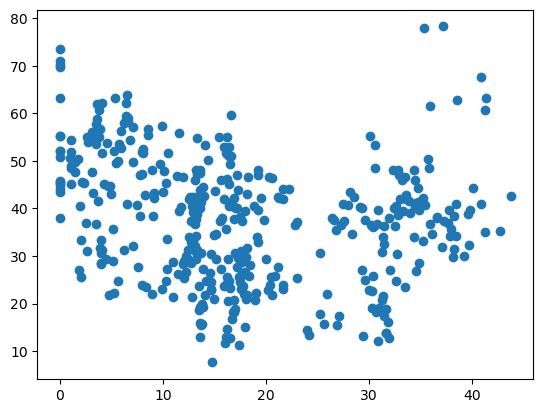

In [23]:
plt.scatter(df1['age'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")


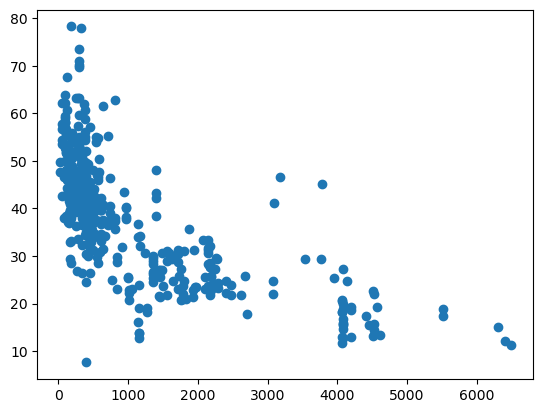

In [59]:
plt.scatter(df1['neighborhood'],df1['price'])
plt.xlabel=("age")
plt.ylabel=("price")

<Axes: xlabel='age', ylabel='price'>

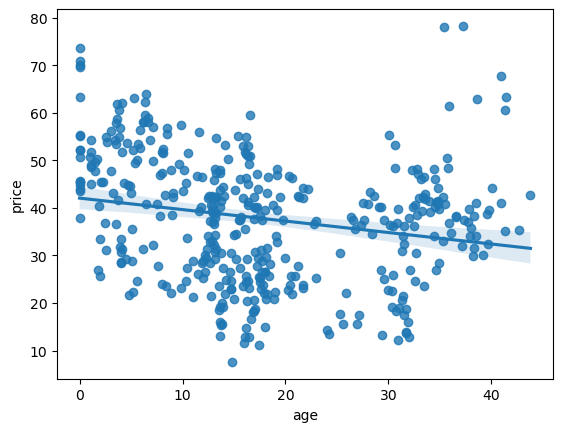

In [60]:
import seaborn as sns
sns.regplot(x="age",y="price", data=df1)

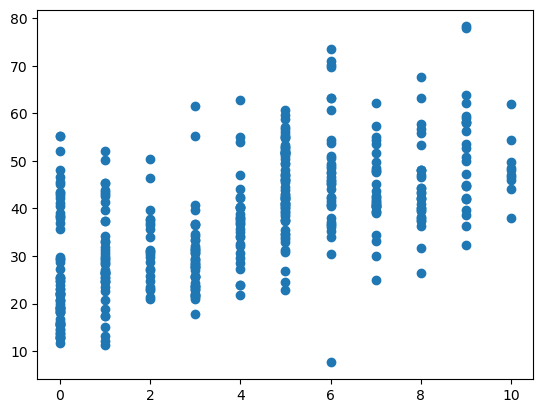

In [61]:
plt.scatter(df1['store'],df1['price'])
plt.show()

<Axes: xlabel='neighborhood', ylabel='price'>

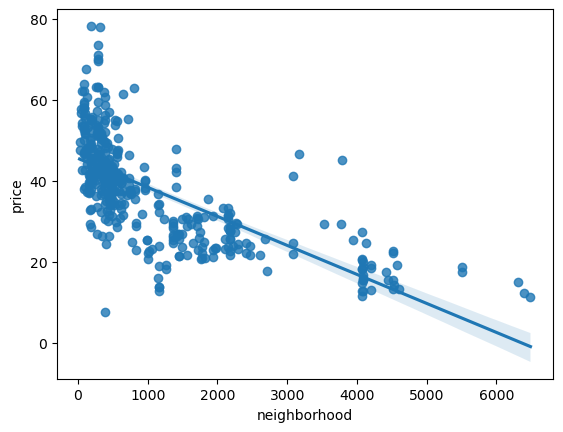

In [62]:

sns.regplot(x="neighborhood",y="price", data=df1)

<Axes: xlabel='X5 latitude', ylabel='price'>

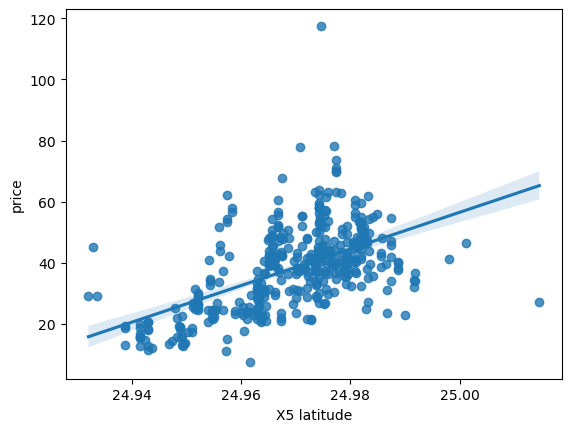

In [62]:
sns.regplot(x="X5 latitude",y="price", data=df)

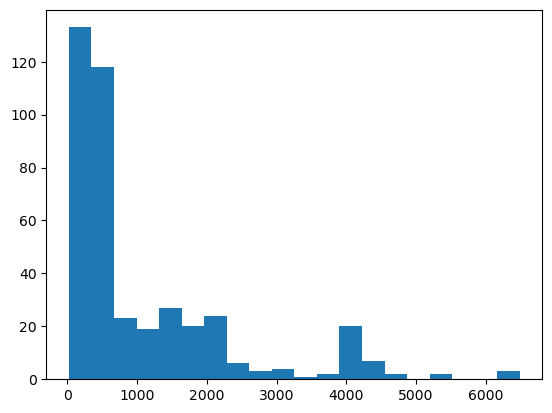

In [63]:
plt.hist(df.neighborhood, bins=20)
plt.show()

In [24]:
df.price.min()


7.6

In [25]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [26]:
X.head()

,age,neighborhood,store
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


In [27]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
X_train

,age,neighborhood,store
265,15.7,815.9314,4
55,31.7,1160.6320,0
323,28.6,197.1338,6
349,7.8,104.8101,5
56,33.6,371.2495,8
...,...,...,...
68,30.4,464.2230,6
74,6.8,379.5575,10
42,36.1,519.4617,5
134,33.4,186.9686,6


In [30]:
from sklearn .preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
X_test=scaler.transform(X_test)

In [33]:
X_train

array([[-1.89402743e-01, -1.69527542e-01, -6.32816516e-02],
       [ 1.20692019e+00,  1.16917637e-01, -1.43265510e+00],
       [ 9.36382621e-01, -6.83746519e-01,  6.21405070e-01],
       [-8.78837191e-01, -7.60467241e-01,  2.79061709e-01],
       [ 1.37273354e+00, -5.39056887e-01,  1.30609179e+00],
       [-1.35882320e+00, -6.94386273e-01,  6.21405070e-01],
       [-6.60661733e-01,  1.71181536e+00, -1.43265510e+00],
       [-3.23164133e-02, -5.18759618e-01,  2.79061709e-01],
       [-4.16305220e-01,  1.20412811e-01, -6.32816516e-02],
       [ 1.25928230e+00, -7.56199739e-01,  1.99077851e+00],
       [ 1.17201212e+00,  6.13666065e-01, -1.09031173e+00],
       [ 1.07315880e-01, -4.64390058e-01,  2.79061709e-01],
       [-1.55954462e+00, -6.93472675e-01, -1.43265510e+00],
       [-1.00101545e+00, -7.72395406e-01,  1.64843515e+00],
       [-7.65385953e-01,  3.17507028e-01, -1.43265510e+00],
       [-4.94848385e-01,  2.82707365e-01, -1.09031173e+00],
       [-1.22791792e+00, -5.28575605e-01

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression=LinearRegression()

In [36]:
regression.fit(X_train,Y_train)

LinearRegression()

In [37]:
print(regression.coef_)

[-2.90532543 -5.98899503  4.56355047]


In [38]:
print(regression.intercept_)

37.907575757575756


In [39]:
reg_pred=regression.predict(X_test)

In [40]:
reg_pred

array([36.30498972, 31.19875611, 30.01384162, 41.17520006, 33.03856456,
       44.14252653, 18.35058277, 46.53588221, 42.97919461, 29.26738486,
       43.88622417, 43.04224722, 34.79296255, 27.56758762, 33.4340554 ,
       42.82187104, 16.45291659, 11.99202668, 32.72715538, 17.16213362,
       46.19134803, 46.68801118, 35.9421602 , 34.08391683, 44.23107923,
       11.91869265, 46.69722989, 18.00305123, 48.89222879, 31.58381647,
       43.19001567, 42.89011825, 47.22627219, 32.49981155, 36.39947481,
       34.16572547, 38.07556081, 31.10922867, 43.19001567, 30.65227585,
       51.41603732, 17.18748845, 40.52070424, 46.00991161,  7.11963861,
       47.86107879, 42.61903242, 47.71433621, 46.17662862, 46.21276603,
       13.68770384, 42.53307013, 48.06366283, 52.98979548, 35.55495329,
       16.58984414, 16.65575522, 46.16205638, 32.72715538, 43.70323421,
       49.52908039, 47.9624981 , 43.911579  , 41.76239233, 16.47827142,
       29.76242272, 35.52442196, 33.98754852, 33.75063927, 27.75

In [41]:
score=regression.score(X_test,Y_test)

In [42]:
score

0.6148982488421271

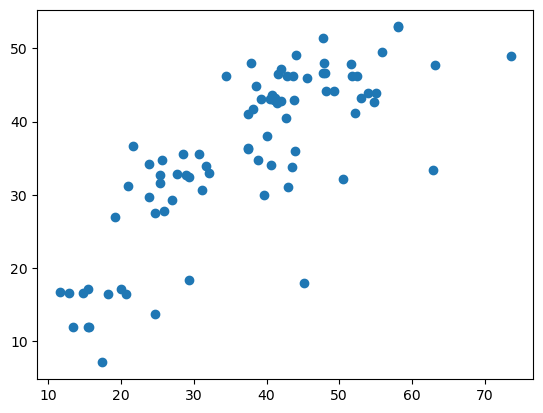

In [43]:
plt.scatter(Y_test,reg_pred)

In [44]:
from sklearn.metrics import r2_score
score1=r2_score(Y_test,reg_pred)
print(score1)

0.6148982488421271


In [45]:
import pickle

In [46]:
pickle.dump(regression,open('regmodel.pk1','wb'))

In [47]:
pickled_model=pickle.load(open('regmodel.pk1','rb'))